# Analitika podataka

Uspješno smo izlučili tekstualne podatke iz naših PDF dokumenata, sljedeći korak je analizirati dobivene podatke.

In [21]:
# Učitavanje izlučenih podataka
import pandas as pd

podaci = pd.read_pickle("./DATASETS/ED4RE_2603_UTOR.pickle")

Pogledajmo osnovne informacije:

In [22]:
podaci.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 7 to 12
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Title                     22 non-null     object
 1   Authors_and_Affiliations  22 non-null     object
 2   Affiliations              22 non-null     object
 3   DOI                       22 non-null     object
 4   Authors                   22 non-null     object
 5   Journal                   22 non-null     object
 6   Date                      22 non-null     object
 7   Subjects                  22 non-null     object
 8   Abstract                  22 non-null     object
 9   References                22 non-null     object
 10  Content                   22 non-null     object
 11  Keywords                  22 non-null     object
 12  Style                     22 non-null     object
dtypes: object(13)
memory usage: 2.4+ KB


Naši podaci se sastoje od 14 stupaca koji uključuju naslov rada, afilijacije, DOI, časopis u kojem je rad objavljen te ključne riječi.



> **Zadatak 1**: Koliko različitih časopisa se pojavljuje u skupu podataka? Koliko se puta pojavljuje svaki od časopisa?

In [23]:
print("Ukupno različitih časopisa: ", len(podaci.Journal.unique()))

print("\nPojavnost pojedinog časopisa: ")
print(podaci["Journal"].value_counts())

Ukupno različitih časopisa:  7

Pojavnost pojedinog časopisa: 
Journal
Journal of Climate                              4
Global Change Biology                           4
Journal of Geophysical Research: Atmospheres    4
no_info                                         3
Climate Dynamics                                3
Energy Policy                                   3
Nature Geoscience                               1
Name: count, dtype: int64


Pogledajmo izlučene ključne riječi:

In [24]:
print(podaci.Keywords)

7                                           no_keywords
6                                           no_keywords
9     [Climate change, , : North Atlantic Ocean; Atm...
10                                          no_keywords
3                                           no_keywords
7                                           no_keywords
4     central Himalaya, climate change, elevation gr...
12    [passive warming, tundra, , artiﬁcial warming,...
5     [, anthropogenic stressors,  canopy-forming al...
11    attribution, Bayesian model averaging, climate...
9                                           no_keywords
5                                           no_keywords
7     • \n• \n• \n A cloud tracking technique is \na...
2     (cid:129) Bidirectional leaders initiate near ...
13    (cid:129) The amplitude of the HC response to\...
10                                          no_keywords
3       Surface air temperature · Mongolian Plateau ...
9                                           no_k

## Analiza ključnih riječi

Neki od istraživačkih radova ne posjeduju ključne riječi ili iste nisu uspješno izlučene. Također, ključne riječi su zapisane u retcima na više različitih načina: lista, string, csv.

> **Zadatak 2**: Funkcijom normalizirajte zapise ključnih riječi u skupu podataka.

In [70]:
import re

keywords = []

for row in podaci[podaci.Keywords != "no_keywords"]["Keywords"]:

    if isinstance(row, list):
        temp_0 = row
    else:
        temp_0 = [row]

    # Riješimo se string lista
    temp_1 = []
    for r in temp_0:
        r_temp = re.split("[,;(\\xa0)·(\n)]", r)

        temp_1.extend(r_temp)

    # Riješimo se praznih članova
    temp_2 = [r.strip().lower() for r in temp_1 if len(r.strip()) > 0] 
    # print(temp_2)

    keywords.append(temp_2)


Top 10 Keywords by Frequency:
climate change: 4
cid:129: 4
•: 3
: north atlantic ocean: 1
atmosphere-ocean interaction: 1
nonlinear dynamics: 1
ocean dynamics: 1
gyres: 1
central himalaya: 1
elevation gradients: 1


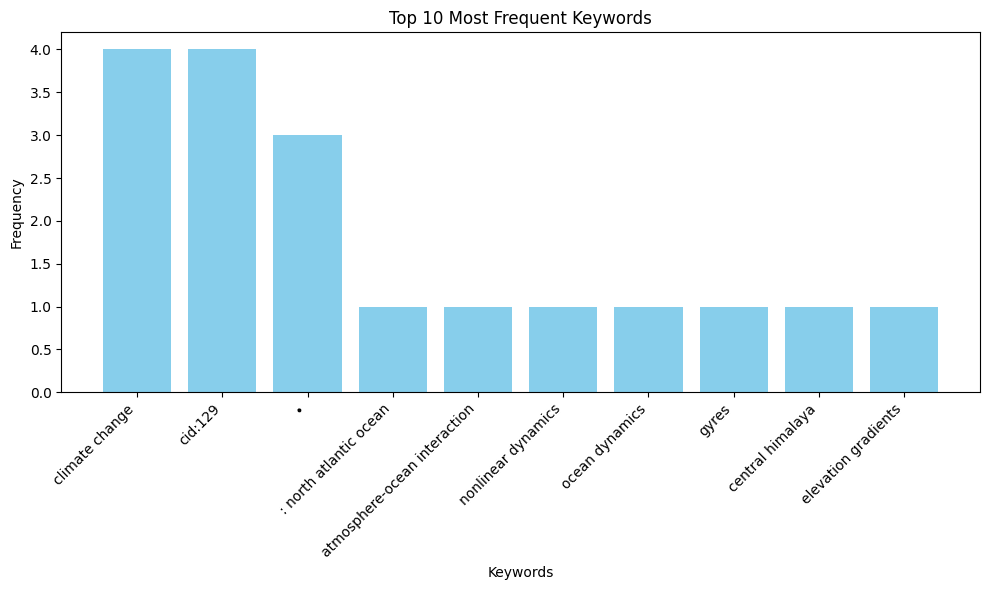

In [71]:
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain


# Flatten the list of lists to a single list of keywords
all_keywords = list(chain.from_iterable(keywords))

# Count frequency of keywords
keyword_counts = Counter(all_keywords)

# Top 10 most common keywords
top_keywords = keyword_counts.most_common(10)

# Display keyword frequency
print("Top 10 Keywords by Frequency:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")

# Visualize the keyword frequency
plt.figure(figsize=(10, 6))
plt.bar([kw[0] for kw in top_keywords], [kw[1] for kw in top_keywords], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Keywords')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

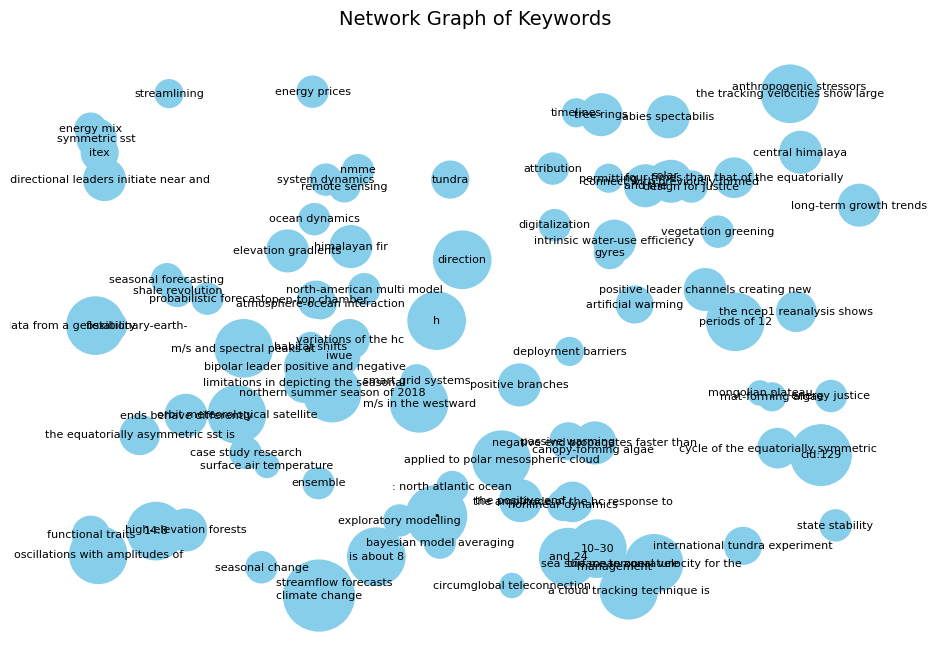

In [90]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for group in keywords:
    # Add all keywords in the group as nodes
    G.add_nodes_from(group)
    # Add edges between all combinations of keywords in the same group
    G.add_edges_from(combinations(group, 2))

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.random_layout(G)  # Spring layout for better visualization
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=[100 * G.degree(node) for node in G.nodes()])
nx.draw_networkx_edges(G, pos, edge_color='white')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Add title and display
plt.title("Network Graph of Keywords", fontsize=14)
plt.axis('off')
plt.show()